## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Getting Data

In [2]:
data = pd.read_csv("IceCreamData (1).csv")

## Knowing data

In [3]:
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [6]:
data.duplicated().sum()

0

## EDA

C:\Users\Lenovo PC\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Temperature', ylabel='Density'>

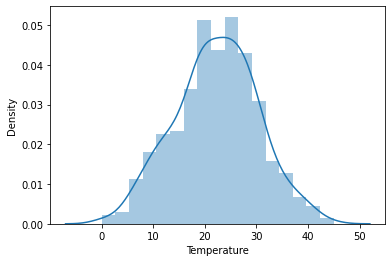

In [7]:
sns.distplot(data['Temperature'])

C:\Users\Lenovo PC\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Revenue', ylabel='Density'>

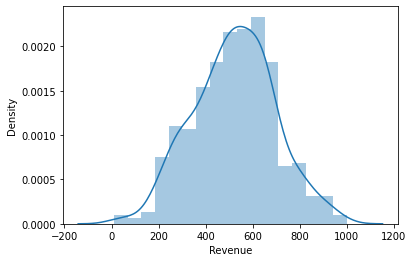

In [8]:
sns.distplot(data['Revenue'])

C:\Users\Lenovo PC\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Revenue'>

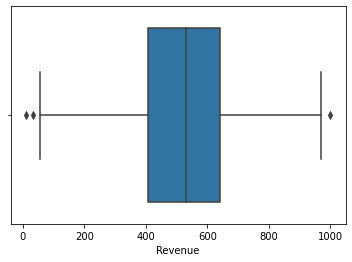

In [9]:
sns.boxplot(data['Revenue'])

C:\Users\Lenovo PC\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Temperature'>

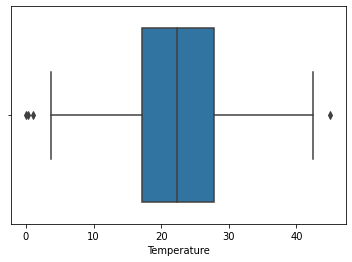

In [10]:
sns.boxplot(data['Temperature'])

We do have some outliers. But, they are few in number, so we can ignore them.

C:\Users\Lenovo PC\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Temperature', ylabel='Revenue'>

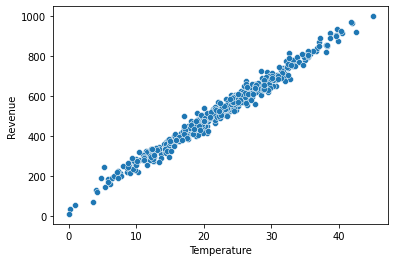

In [11]:
sns.scatterplot(data['Temperature'],data['Revenue'])

As it can be seen above, there is a linear relationship between Temperature and Revenue.

## Preparing Data

In [12]:
x = np.array(data['Temperature']).reshape(-1,1)
y = data['Revenue']

In [13]:
y.shape

(500,)

## Modelling

In [14]:
from sklearn import tree
dtr = tree.DecisionTreeRegressor(max_depth=3)
dtr.fit(x,y)

DecisionTreeRegressor(max_depth=3)

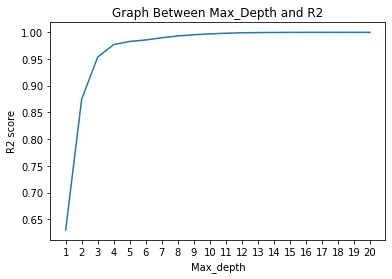

In [15]:
d = [i+1 for i in range(20)]
acc=[]
for i in d:
    dt = tree.DecisionTreeRegressor(max_depth=i)
    dt.fit(x,y)
    acc.append(dt.score(x,y))

plt.plot(d,acc)
plt.title("Graph Between Max_Depth and R2")
plt.xlabel("Max_depth")
plt.ylabel("R2 score")
plt.xticks(np.arange(1,21,1))
plt.show()


Value of R2 increases as we increase depth, but it will also increase overfitting.

For now, we will just take Max_depth to be 3, so as to visualise and understand tree better.

In [16]:
fig,ax = plt.subplots(figsize=(18,10))
tree.plot_tree(dtr,filled=True,fontsize = 10,feature_names=['Temperature'],class_names=['Revenue'])
plt.show()

Let's say its winter season, so temperature is 10 degrees. Let's see what would the revenue be.

We'll start from root node, 

Temperature<=20.989 ->True , so we move on to next branch (left side).

Temperature<=14.882 -> True, so we move on to next branch (left side).

Temperature<=7.889 -> False, so we move on to next branch (right side).

So, our predicted Revenue should be $294.461

Let's check our result with python code.


In [ ]:
dtr.predict([[10]])

array([294.46145514])